## Imports

In [56]:
from sklearn.utils.fixes import loguniform
import numpy as np
import doepy
from doepy import build
import pyDOE2
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic data

In [57]:
X, y = make_classification()

In [58]:
X.shape

(100, 20)

## Functions

In [60]:
def eval_hyper_parameter(clf_class, params, X, y, **kwargs):
    clf = clf_class(**params, **kwargs)
    return np.mean(cross_val_score(clf, X, y))

def eval_plan(clf_class, plan, X, y, key="results", **kwargs):
    with tqdm(total=len(plan)) as pbar:
        def to_eval(params): 
            res = eval_hyper_parameter(clf_class, params, X, y, **kwargs)
            pbar.update(1)
            return res
        plan[key] = plan.apply(to_eval, axis=1)
    return plan

## Categorical values

kernel had more than two levels. Assigning the end point to the high level.
C had more than two levels. Assigning the end point to the high level.


100%|████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 131.15it/s]


,kernel,C,gamma,results
0,linear,0.00001,scale,0.57
1,sigmoid,0.00001,scale,0.57
2,linear,10000.00000,scale,0.82
3,sigmoid,10000.00000,scale,0.80
4,linear,0.00001,auto,0.57


(2, 2, 2)

array([[[0.57, 0.57],
        [0.82, 0.82]],

       [[0.57, 0.57],
        [0.85, 0.8 ]]])

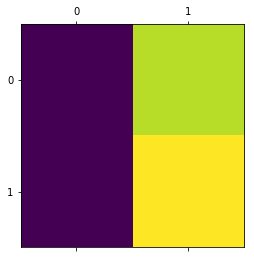

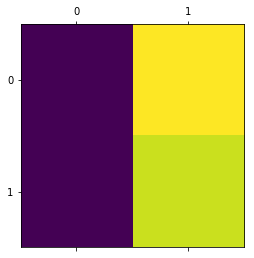

100%|████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 145.46it/s]


,kernel,C,gamma,results
0,linear,0.00001,scale,0.57
1,sigmoid,0.00001,scale,0.57
2,linear,10000.00000,scale,0.82
3,sigmoid,10000.00000,scale,0.80
4,linear,0.00001,auto,0.57


(2, 2, 2)

array([[[0.57, 0.57],
        [0.82, 0.82]],

       [[0.57, 0.57],
        [0.85, 0.8 ]]])

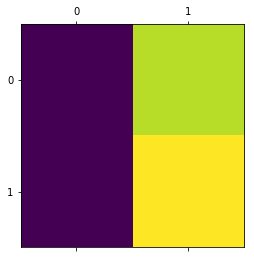

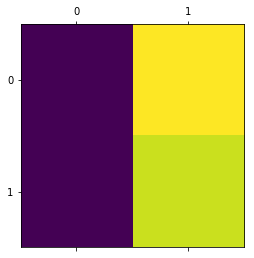

In [72]:
parameters ={'kernel':["linear", "poly", "rbf", "sigmoid"],
    'C':[float("1e{}".format(i)) for i in range(-5, 5)], 
    'gamma':['scale', 'auto']}

plan = build.full_fact(
    parameters
)
for build_plan in {build.full_fact, build.frac_fact_res}:
    plan = build_plan(
        parameters
    )

    for key in {"gamma", "kernel"}:
        plan[key] = plan[key].apply(lambda elt: parameters[key][int(elt)])
    results = eval_plan(SVC, plan, X, y)
    enc = OrdinalEncoder()
    enc.fit(results.loc[:, results.columns != 'results'])
    indices = enc.transform(results.loc[:, results.columns != 'results'])
    display(results.head())
    shape = tuple([len(elt) for elt in enc.categories_])
    values = np.zeros(shape)
    display(values.shape)
    for idx, value in zip(indices, results['results']):
        idx = tuple(map(int, idx))
        values[idx] = value
    display(values)
    
    
    plt.matshow(values[:,:,0])
    plt.show()
    plt.close()
    plt.matshow(values[:,:,1])
    plt.show()
    plt.close()

## Numerical values

  0%|                                                                                                | 0/32 [00:00<?, ?it/s]C:\Users\luism\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\luism\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\luism\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\luism\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "t

,C,l1_ratio,results
0,1.000000e-08,0.0,0.74
1,1.000000e-07,0.0,0.62
2,1.000000e-06,0.0,0.75
3,1.000000e-05,0.0,0.56
4,1.000000e-04,0.0,0.55


(16, 2)

array([[0.74, 0.49],
       [0.62, 0.49],
       [0.75, 0.49],
       [0.56, 0.51],
       [0.55, 0.51],
       [0.87, 0.49],
       [0.9 , 0.51],
       [0.91, 0.93],
       [0.9 , 0.92],
       [0.86, 0.88],
       [0.86, 0.86],
       [0.86, 0.86],
       [0.86, 0.86],
       [0.86, 0.86],
       [0.86, 0.86],
       [0.86, 0.86]])

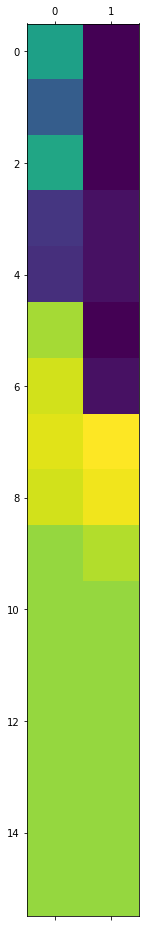

In [73]:
parameters ={
    'C':[float("1e{}".format(i)) for i in range(-8, 8)], 
    'l1_ratio':[0, 1]}

plan = build.full_fact(
    parameters
)

results = eval_plan(LogisticRegression, plan, X, y, penalty="elasticnet", solver="saga")
enc = OrdinalEncoder()
enc.fit(results.loc[:, results.columns != 'results'])
indices = enc.transform(results.loc[:, results.columns != 'results'])
display(results.head())
shape = tuple([len(elt) for elt in enc.categories_])
values = np.zeros(shape)
display(values.shape)
for idx, value in zip(indices, results['results']):
    idx = tuple(map(int, idx))
    values[idx] = value
display(values)
plt.matshow(values[:,:])
plt.show()
plt.close()


In [75]:
plans = {build.full_fact, build.frac_fact_res, build.plackett_burman, 
         build.sukharev, build.box_behnken} | {
    lambda *args, **kwargs: build.central_composite(*args, **kwargs, face=face) for face in {'ccf', 'cci', 'ccc'}} | {
    build.lhs,
    build.space_filling_lhs,
    build.random_k_means,
    build.maximin,
    build.halton,
    build.uniform_random
}

In [78]:
for build_plan in plans:
    p = build_plan(parameters)
    display(p.head())

,C,l1_ratio
0,1.000000e-08,0.0
1,1.000000e+07,0.0
2,1.000000e-08,1.0
3,1.000000e+07,1.0
4,5.000000e+06,0.5


C had more than two levels. Assigning the end point to the high level.
l1_ratio had more than two levels. Assigning the end point to the high level.


,C,l1_ratio
0,3.305702e+06,0.039046
1,9.228234e+06,0.788869


AssertionError: Number of factors must be greater than desired resolution